In [1]:
import numpy as np
import persim
from numpy import linalg as la
import matplotlib.pyplot as plt

from data_cube import DataCube
from ripser import lower_star_img
from persim import plot_diagrams, PersImage, bottleneck

from similarity_network_fusion import SNF, cumulated_euc_ts

In [ ]:
dc = DataCube(
    subjects="all",
    gestures="all",
    channels=["2", "4", "6", "8"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(100, 50)
dc.normalize_modalities(smooth=True)
dc.normalize_modalities(smooth=False)

In [ ]:
ex_raw1 = dc.data_set["10"]["3_0_1"]

In [ ]:
plt.figure(num=None, figsize=(15, 6))
plt.subplots_adjust(hspace = 0.3)
plt.suptitle('Subject 1; Gesture "left"')
plt.subplot(221)
plt.title("Channel 1 - synergist")
plt.plot(ex_raw1[:,0],ex_raw1[:,1], color="black")
plt.subplot(222)
plt.title("Channel 2 - antagonist")
plt.plot(ex_raw1[:,0],ex_raw1[:,2], color="black")
plt.subplot(223)
plt.title("Channel 3 - antagonist")
plt.plot(ex_raw1[:,0],ex_raw1[:,3], color="black")
plt.subplot(224)
plt.title("Channel 4 - synergist")
plt.plot(ex_raw1[:,0],ex_raw1[:,4], color="black")
plt.savefig("../../Thesis/LaTeX_template/images/raw_chan_examp.png", bbox_inches = 'tight',
    pad_inches = 0)

In [ ]:
ex_smth1 = dc.data_set_smooth["10"]["3_0_1"]

In [ ]:
plt.figure(num=None, figsize=(15, 6))
plt.subplots_adjust(hspace = 0.3)
plt.suptitle('Subject 1; Gesture "left"')
plt.subplot(221)
plt.title("Channel 1 - synergist")
plt.plot(ex_smth1[:,0],ex_smth1[:,1], color="black")
plt.subplot(222)
plt.title("Channel 2 - antagonist")
plt.plot(ex_smth1[:,0],ex_smth1[:,2], color="black")
plt.subplot(223)
plt.title("Channel 3 - antagonist")
plt.plot(ex_smth1[:,0],ex_smth1[:,3], color="black")
plt.subplot(224)
plt.title("Channel 4 - synergist")
plt.plot(ex_smth1[:,0],ex_smth1[:,4], color="black")
plt.savefig("../../Thesis/LaTeX_template/images/smth_chan_examp.png", bbox_inches = 'tight',
    pad_inches = 0)

---

In [2]:
dc = DataCube(
    subjects=["10", "20"],
    gestures="all",
    channels=["2", "4", "6", "8"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(100, 50)
dc.normalize_modalities(smooth=True)

In [ ]:
def cet(i, j):
    """
    cumulated version of the time series w/ euclidean distance
    in which we take the sum values over time as time increases
    and then apply the chosen metric.
    i, j - arrays of data points
    """
    return la.norm(i.sum(axis=0) - j.sum(axis=0))

In [ ]:
ex_g1 = dc.data_set_smooth["10"]["3_0_1"]
ex_g2 = dc.data_set_smooth["10"]["4_0_1"]
ex_g3 = dc.data_set_smooth["10"]["5_0_1"]
ex_g4 = dc.data_set_smooth["10"]["6_0_1"]

In [ ]:
ex_ssm1 = np.zeros(shape=(ex_g1.shape[0],ex_g1.shape[0]))
ex_ssm2 = np.zeros(shape=(ex_g2.shape[0],ex_g2.shape[0]))
ex_ssm3 = np.zeros(shape=(ex_g3.shape[0],ex_g3.shape[0]))
ex_ssm4 = np.zeros(shape=(ex_g4.shape[0],ex_g4.shape[0]))

In [ ]:
for i in range(ex_g1.shape[0]):
    for j in range(ex_g1.shape[0]):
        ex_ssm1[i,j] = cet(ex_g1[:i,1:-1],ex_g1[:j,1:-1])

In [ ]:
for i in range(ex_g2.shape[0]):
    for j in range(ex_g2.shape[0]):
        ex_ssm2[i,j] = cet(ex_g2[:i,1:-1],ex_g2[:j,1:-1])

In [ ]:
for i in range(ex_g3.shape[0]):
    for j in range(ex_g3.shape[0]):
        ex_ssm3[i,j] = cet(ex_g3[:i,1:-1],ex_g3[:j,1:-1])

In [ ]:
for i in range(ex_g4.shape[0]):
    for j in range(ex_g4.shape[0]):
        ex_ssm4[i,j] = cet(ex_g4[:i,1:-1],ex_g4[:j,1:-1])

In [ ]:
plt.figure(num=None, figsize=(6, 6))
plt.subplots_adjust(hspace = 0.1)
plt.suptitle('Subject 10')
plt.subplot(221)
plt.title('"Left"')
plt.imshow(ex_ssm1)
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.title('"Right"')
plt.imshow(ex_ssm2)
plt.xticks([])
plt.yticks([])
plt.subplot(223)
plt.title('"Up"')
plt.imshow(ex_ssm3)
plt.xticks([])
plt.yticks([])
plt.subplot(224)
plt.title('"Down"')
plt.imshow(ex_ssm4)
plt.xticks([])
plt.yticks([])
plt.savefig("../../Thesis/LaTeX_template/images/ssm_examp.png", bbox_inches = 'tight',
    pad_inches = 0)

---

In [ ]:
from ripser import Rips
from persim import PersImage, plot_diagrams

In [ ]:
rips = Rips()
dgms = rips.fit_transform(ex_ssm2, distance_matrix=True)

In [ ]:
pim = PersImage(spread=1, pixels=[40,40], verbose=False)
img = pim.transform(dgms[1])

In [ ]:
pim.show(img)

In [ ]:
plt.figure(num=None, figsize=(15, 6))
plt.margins(0,0)
plt.subplots_adjust(hspace = 0.1)
plt.subplot(131)
plt.title("Self-Similarity Matrix")
plt.imshow(ex_ssm1)
plt.subplot(132)
plt.title("Persistence Diagram")
plot_diagrams(dgms)
plt.subplot(133)
plt.title("Persistence Image: 1-cycles")
pim.show(img)
plt.savefig("../../Thesis/LaTeX_template/images/raw_persist_examp.png", bbox_inches = 'tight',
    pad_inches = 0)

---

In [ ]:
from scipy.ndimage import gaussian_filter

In [ ]:
snf = SNF(dc.data_set_smooth["10"]["3_0_1"][:,:-1], k=0.2, metric=cumulated_euc_ts)

In [ ]:
snf.calc_weights()
snf.normalize_weights()
# generate and normalize knn graphs
snf.calc_knn_weights()
snf.normalize_knn_weights()
# fuse graphs
snf.network_fusion(eta=1, iters=20)

In [ ]:
snf.plot_template()

In [ ]:
snf_ex = gaussian_filter(snf.fused_similarity_template,sigma=1)

In [ ]:
rips = Rips()
pim = PersImage(spread=1, pixels=[40,40], verbose=False)

In [ ]:
dgms = rips.fit_transform(snf_ex, distance_matrix=True)
img = pim.transform(dgms[1])

In [ ]:
plt.figure(num=None, figsize=(15, 6))
plt.margins(0,0)
plt.subplots_adjust(hspace = 0.1)
plt.subplot(131)
plt.title("Fused Similarity Template")
plt.imshow(snf_ex)
plt.subplot(132)
plt.title("Persistence Diagram")
plot_diagrams(dgms)
plt.subplot(133)
plt.title("Persistence Image: 1-cycles")
pim.show(img)
plt.savefig("../../Thesis/LaTeX_template/images/snf_persist_examp.png", bbox_inches = 'tight',
    pad_inches = 0)

---

---

In [40]:
snf11 = SNF(dc.data_set_smooth["10"]["3_0_1"][:,:-1], k=0.2, metric=cumulated_euc_ts)
snf12 = SNF(dc.data_set_smooth["10"]["4_0_1"][:,:-1], k=0.2, metric=cumulated_euc_ts)
snf13 = SNF(dc.data_set_smooth["10"]["5_0_1"][:,:-1], k=0.2, metric=cumulated_euc_ts)
snf14 = SNF(dc.data_set_smooth["10"]["6_0_1"][:,:-1], k=0.2, metric=cumulated_euc_ts)

In [41]:
snf11.calc_weights()
snf11.normalize_weights()
# generate and normalize knn graphs
snf11.calc_knn_weights()
snf11.normalize_knn_weights()
# fuse graphs
snf11.network_fusion(eta=1, iters=20)

In [42]:
snf12.calc_weights()
snf12.normalize_weights()
# generate and normalize knn graphs
snf12.calc_knn_weights()
snf12.normalize_knn_weights()
# fuse graphs
snf12.network_fusion(eta=1, iters=20)

In [43]:
snf13.calc_weights()
snf13.normalize_weights()
# generate and normalize knn graphs
snf13.calc_knn_weights()
snf13.normalize_knn_weights()
# fuse graphs
snf13.network_fusion(eta=1, iters=20)

In [44]:
snf14.calc_weights()
snf14.normalize_weights()
# generate and normalize knn graphs
snf14.calc_knn_weights()
snf14.normalize_knn_weights()
# fuse graphs
snf14.network_fusion(eta=1, iters=20)

In [34]:
snf21 = SNF(dc.data_set_smooth["20"]["3_0_1"][:,:-1], k=0.2, metric=cumulated_euc_ts)
snf22 = SNF(dc.data_set_smooth["20"]["4_0_1"][:,:-1], k=0.2, metric=cumulated_euc_ts)
snf23 = SNF(dc.data_set_smooth["20"]["5_0_1"][:,:-1], k=0.2, metric=cumulated_euc_ts)
snf24 = SNF(dc.data_set_smooth["20"]["6_0_1"][:,:-1], k=0.2, metric=cumulated_euc_ts)

In [35]:
snf21.calc_weights()
snf21.normalize_weights()
# generate and normalize knn graphs
snf21.calc_knn_weights()
snf21.normalize_knn_weights()
# fuse graphs
snf21.network_fusion(eta=1, iters=20)

In [36]:
snf22.calc_weights()
snf22.normalize_weights()
# generate and normalize knn graphs
snf22.calc_knn_weights()
snf22.normalize_knn_weights()
# fuse graphs
snf22.network_fusion(eta=1, iters=20)

In [37]:
snf23.calc_weights()
snf23.normalize_weights()
# generate and normalize knn graphs
snf23.calc_knn_weights()
snf23.normalize_knn_weights()
# fuse graphs
snf23.network_fusion(eta=1, iters=20)

In [38]:
snf24.calc_weights()
snf24.normalize_weights()
# generate and normalize knn graphs
snf24.calc_knn_weights()
snf24.normalize_knn_weights()
# fuse graphs
snf24.network_fusion(eta=1, iters=20)

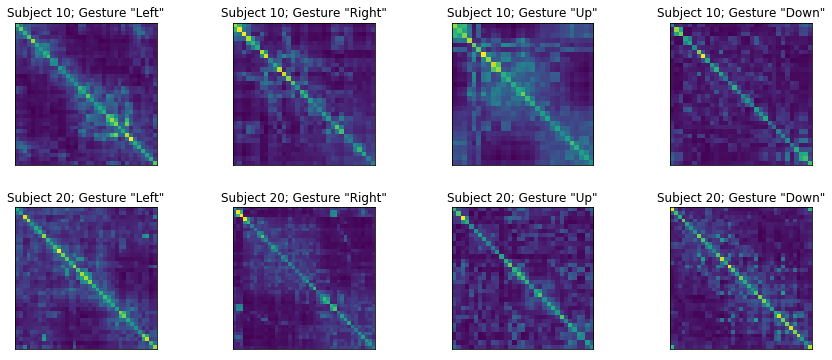

In [45]:
plt.figure(num=None, figsize=(15, 6))
plt.margins(0,0)
plt.subplots_adjust(hspace = 0.3)
plt.subplot(241)
plt.title('Subject 10; Gesture "Left"')
plt.imshow(snf11.fused_similarity_template)
plt.xticks([])
plt.yticks([])
plt.subplot(242)
plt.title('Subject 10; Gesture "Right"')
plt.imshow(snf12.fused_similarity_template)
plt.xticks([])
plt.yticks([])
plt.subplot(243)
plt.title('Subject 10; Gesture "Up"')
plt.imshow(snf13.fused_similarity_template)
plt.xticks([])
plt.yticks([])
plt.subplot(244)
plt.title('Subject 10; Gesture "Down"')
plt.imshow(snf14.fused_similarity_template)
plt.xticks([])
plt.yticks([])
plt.subplot(245)
plt.title('Subject 20; Gesture "Left"')
plt.imshow(snf21.fused_similarity_template)
plt.xticks([])
plt.yticks([])
plt.subplot(246)
plt.title('Subject 20; Gesture "Right"')
plt.imshow(snf22.fused_similarity_template)
plt.xticks([])
plt.yticks([])
plt.subplot(247)
plt.title('Subject 20; Gesture "Up"')
plt.imshow(snf23.fused_similarity_template)
plt.xticks([])
plt.yticks([])
plt.subplot(248)
plt.title('Subject 20; Gesture "Down"')
plt.imshow(snf24.fused_similarity_template)
plt.xticks([])
plt.yticks([])
plt.savefig("../../Thesis/LaTeX_template/images/snf_temp_examp.png", bbox_inches = 'tight',
    pad_inches = 0)

---

In [30]:
snf1 = SNF(dc.data_set_smooth["10"]["5_1_2"][:,:-1], k=0.2, metric=cumulated_euc_ts, autotune=True)
snf1.calc_weights()
snf1.normalize_weights()
snf1.calc_knn_weights()
snf1.normalize_knn_weights()

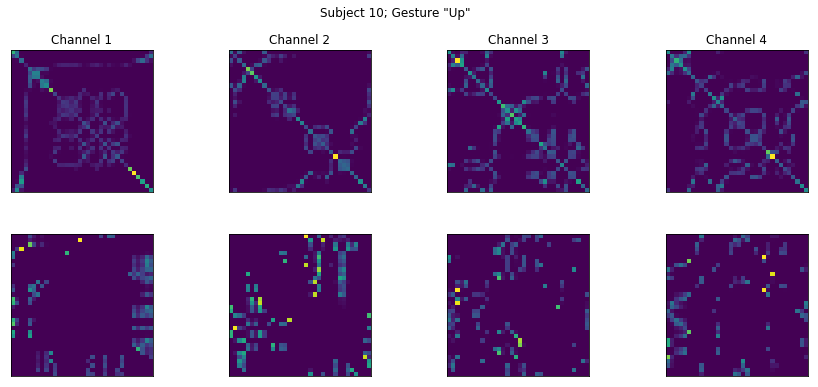

In [33]:
plt.figure(num=None, figsize=(15, 6))
plt.margins(0,0)
plt.subplots_adjust(hspace = 0.3)
plt.suptitle('Subject 10; Gesture "Up"')
plt.subplot(241)
plt.title("Channel 1")
plt.imshow(snf1.P[0,:,:])
plt.xticks([])
plt.yticks([])
plt.subplot(242)
plt.title("Channel 2")
plt.imshow(snf1.P[1,:,:])
plt.xticks([])
plt.yticks([])
plt.subplot(243)
plt.title("Channel 3")
plt.imshow(snf1.P[2,:,:])
plt.xticks([])
plt.yticks([])
plt.subplot(244)
plt.title("Channel 4")
plt.imshow(snf1.P[3,:,:])
plt.xticks([])
plt.yticks([])
plt.subplot(245)
plt.imshow(snf1.P_knn[0,:,:])
plt.xticks([])
plt.yticks([])
plt.subplot(246)
plt.imshow(snf1.P_knn[1,:,:])
plt.xticks([])
plt.yticks([])
plt.subplot(247)
plt.imshow(snf1.P_knn[2,:,:])
plt.xticks([])
plt.yticks([])
plt.subplot(248)
plt.imshow(snf1.P_knn[3,:,:])
plt.xticks([])
plt.yticks([])
plt.savefig("../../Thesis/LaTeX_template/images/graph_examps.png", bbox_inches = 'tight',
    pad_inches = 0)

In [47]:
snf1.network_fusion(eta=1, iters=20)

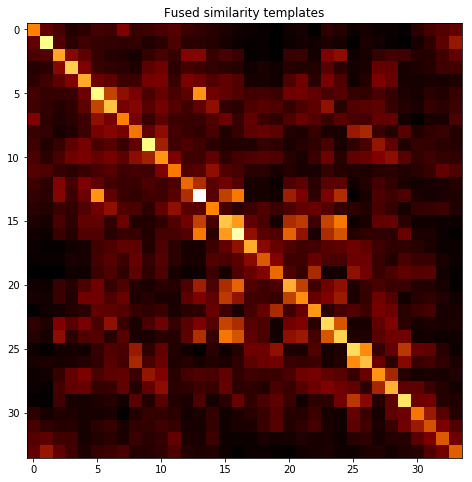

In [48]:
snf1.plot_template()